In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Normalize and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., tf.newaxis]  # shape: (batch, 28, 28, 1)
x_test = x_test[..., tf.newaxis]

In [4]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

Epoch 1/10
1875/1875 - 11s - 6ms/step - accuracy: 0.8057 - loss: 0.5270 - val_accuracy: 0.8708 - val_loss: 0.3566
Epoch 2/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8782 - loss: 0.3346 - val_accuracy: 0.8901 - val_loss: 0.3007
Epoch 3/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8969 - loss: 0.2863 - val_accuracy: 0.9012 - val_loss: 0.2757
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9075 - loss: 0.2525 - val_accuracy: 0.8980 - val_loss: 0.2814
Epoch 5/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9153 - loss: 0.2289 - val_accuracy: 0.9095 - val_loss: 0.2499
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9237 - loss: 0.2059 - val_accuracy: 0.9123 - val_loss: 0.2450
Epoch 7/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9298 - loss: 0.1872 - val_accuracy: 0.9124 - val_loss: 0.2504
Epoch 8/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9356 - loss: 0.1716 - val_accuracy: 0.9090 - val_loss: 0.2549
Epoch 9/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9408 - loss: 0.1545 - val_accuracy: 

In [7]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f}")


✅ Final Test Accuracy: 0.9101


In [8]:
# Classification Report
y_pred = np.argmax(model.predict(x_test), axis=1)
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.91      0.87      1000
           3       0.93      0.90      0.92      1000
           4       0.83      0.88      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.82      0.60      0.70      1000
           7       0.97      0.96      0.97      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



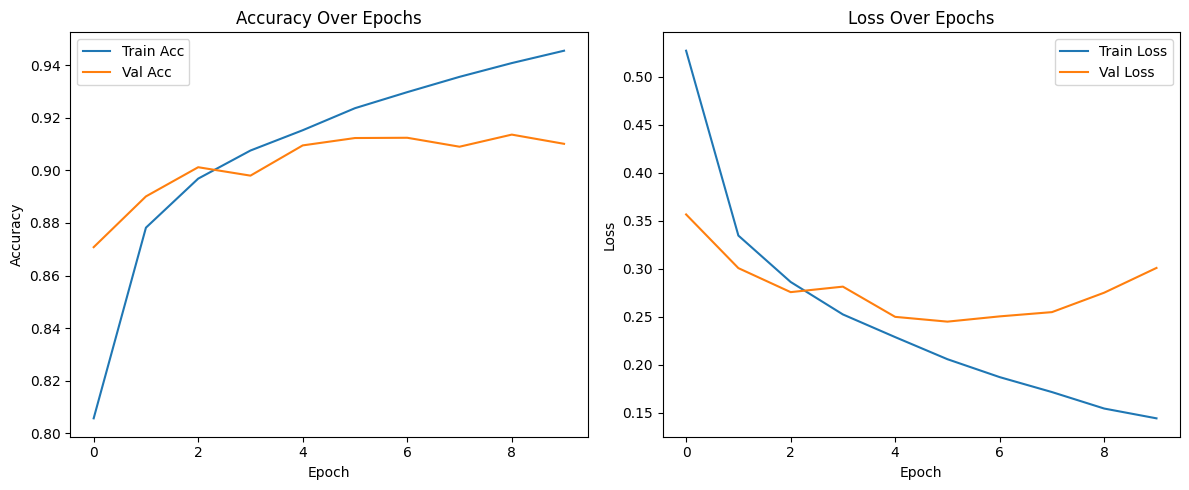

In [9]:
# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()